# **Problem Statement**

# Create a Decision Tree Classifier on iris dataset and Visualize it Graphically.

# **Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df=df.drop('Id',axis=1)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_outcome = pd.crosstab(index=df["Species"],columns="count")      
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# **Performing EDA**

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

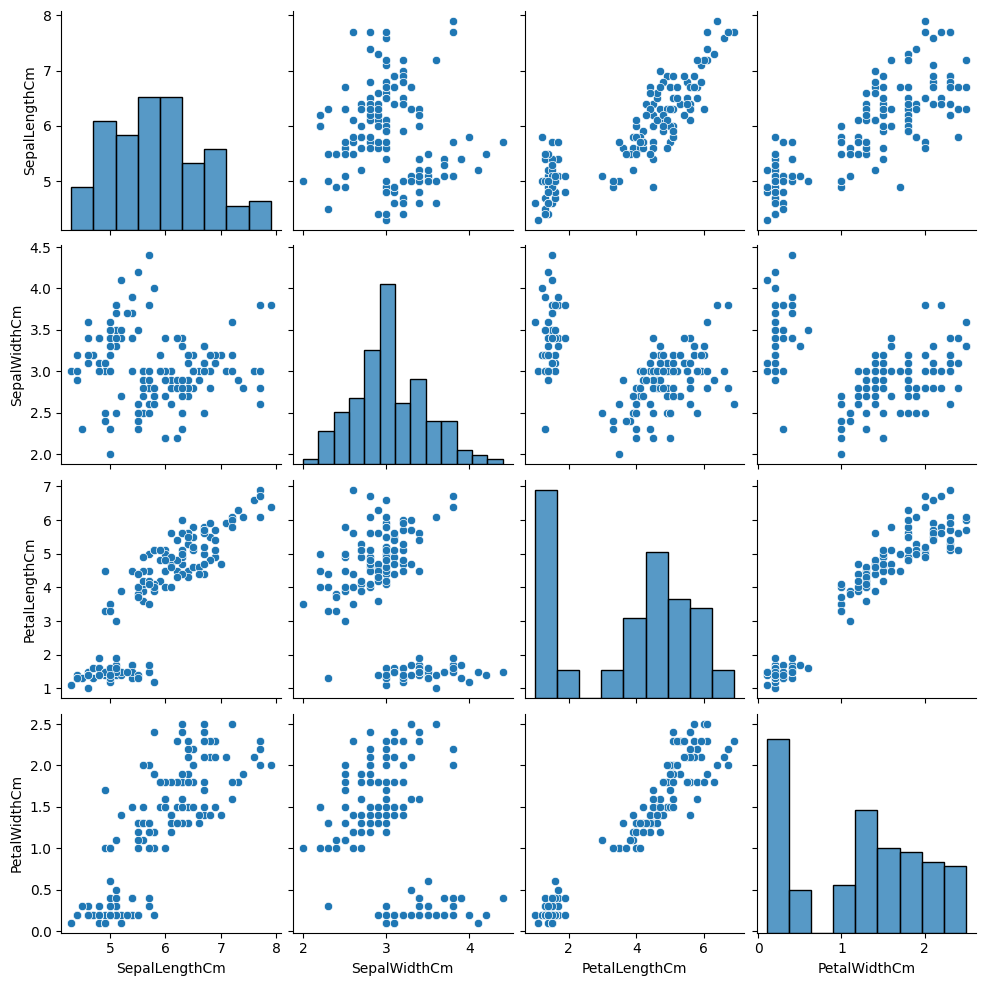

In [13]:
sns.pairplot(df)
plt.show()

<Axes: >

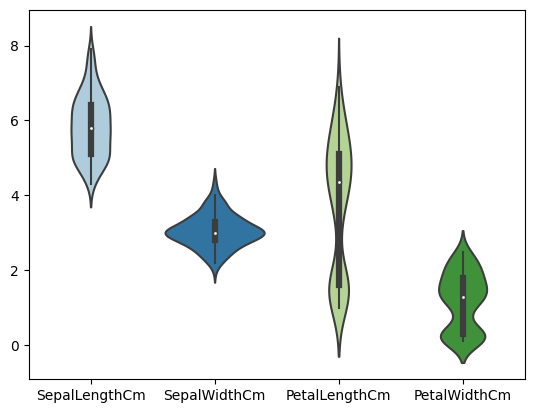

In [14]:
sns.violinplot(data=df, palette="Paired")

<Axes: >

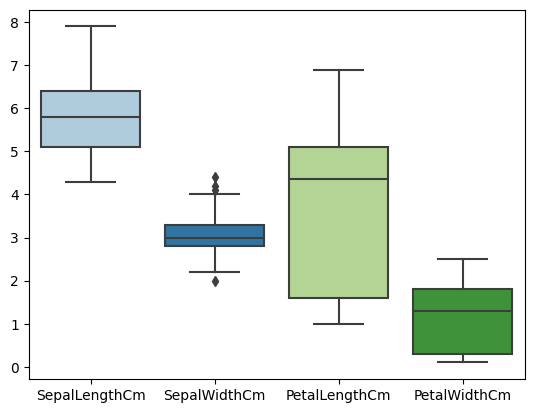

In [15]:
sns.boxplot(data=df,palette="Paired")

<Axes: >

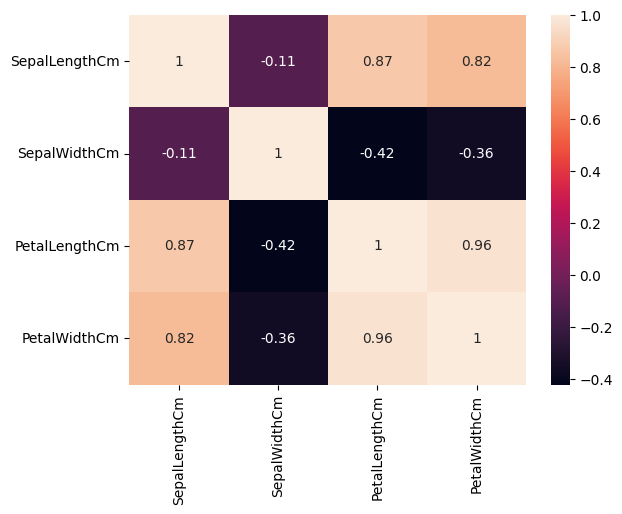

In [16]:
sns.heatmap(df.corr(), annot=True)

# **Preparing the data**

In [18]:
x=df.iloc[:,0:4]      
y=df['Species']

In [19]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# **Splitting the data into train and test data**

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

# **Training the model**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [24]:
dec0=DecisionTreeClassifier(criterion='entropy',random_state=33,max_depth=None)
dec0.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

# **Making the predictions by using trained model**

In [25]:
y_pred=dec0.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# **Now we have to compare the actual values and predicted values**

In [26]:
data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data

,Actual,Predicted
55,Iris-versicolor,Iris-versicolor
22,Iris-setosa,Iris-setosa
26,Iris-setosa,Iris-setosa
56,Iris-versicolor,Iris-versicolor
134,Iris-virginica,Iris-virginica
131,Iris-virginica,Iris-virginica
23,Iris-setosa,Iris-setosa
34,Iris-setosa,Iris-setosa
85,Iris-versicolor,Iris-versicolor
21,Iris-setosa,Iris-setosa


# **Checking the accuracy of the model**

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

1.0

# **Visualizing the Decision Tree**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


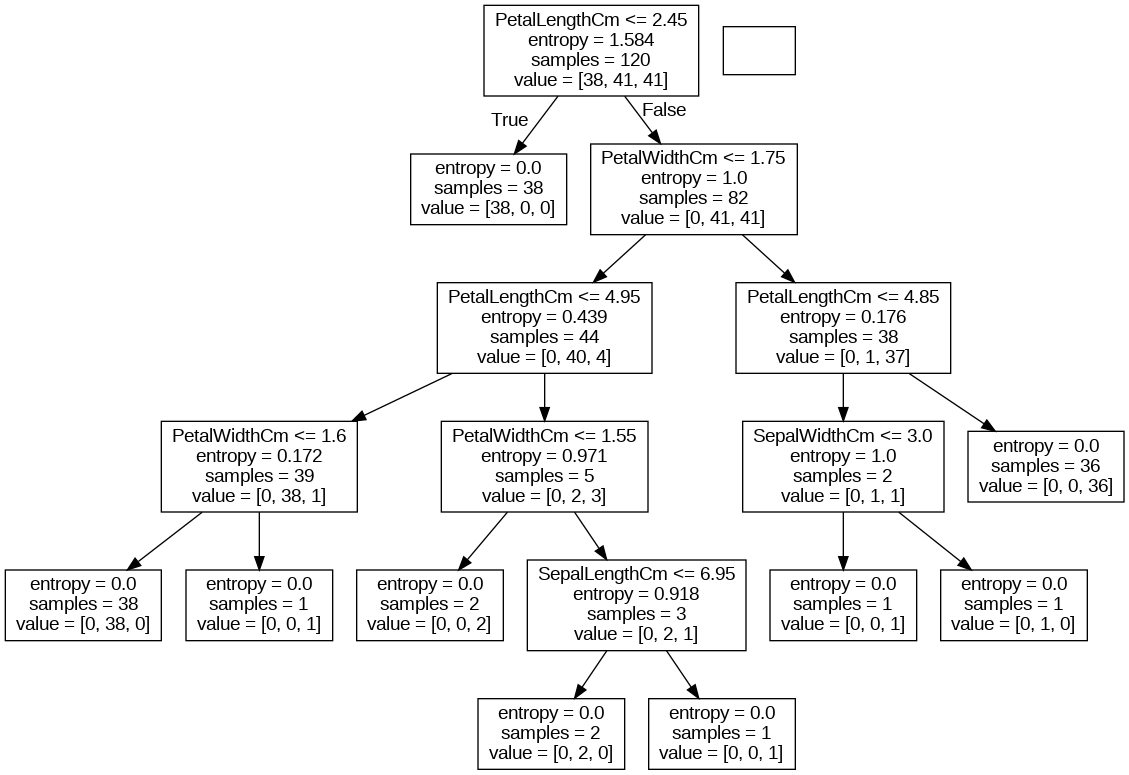

In [29]:
# Plotting of decission tree
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = x.columns
dot_data = export_graphviz(dec0, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# **Hyperparameter tunning for decision tree by using grid search CV**


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [34]:
grid_search = GridSearchCV(estimator=dec0,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1)

In [35]:
grid = grid_search.fit(x_train,y_train)

In [36]:
grid.best_score_

0.9333333333333332

In [37]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}

# Here we got the best parameters for decision tree model.

# **Now let's tune the best parameters which is given by gridsearch CV**

In [38]:
dec1=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)
dec1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [42]:
y_pred1=dec1.predict(x_test)
y_pred1

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [43]:
accuracy_score(y_test,y_pred1)

1.0

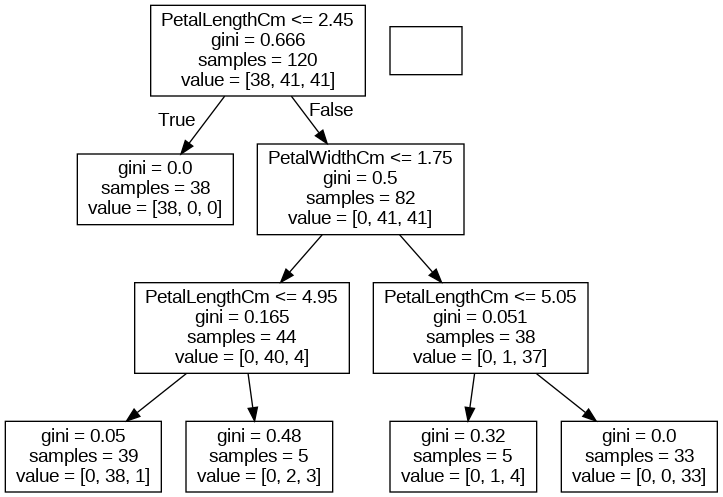

In [44]:
eatures = x.columns
dot_data = export_graphviz(dec1, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())